In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [2]:
np.set_printoptions(threshold=np.inf)

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

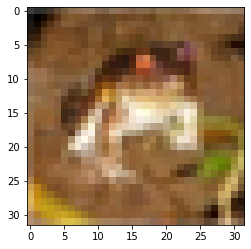

In [4]:
plt.imshow(x_train[0])
plt.show()

In [5]:
print("x_train[0]:\n",x_train[0])

x_train[0]:
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  [ 68  54  42]
  [ 98  73  52]
  [119  91  63]
  [139 107  75]
  [145 110  80]
  [149 117  89]
  [149 120  93]
  [131 103  77]
  [125  99  76]
  [142 115  91]
  [144 112  86]
  [137 105  79]
  [129  97  71]
  [137 106  79]
  [134 106  76]
  [124  97  64]
  [139 113  78]
  [139 112  75]
  [133 105  69]
  [136 105  74]
  [139 108  77]
  [152 120  89]
  [163 131 100]
  [168 136 108]
  [159 129 102]
  [158 130 104]
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  [ 51  27   8]
  [ 88  51  21]
  [120  82  43]
  [128  89  45]
  [127  86  44]
  [126  87  50]
  [116  79  44]
  [106  70  37]
  [101  67  35]
  [105  70  36]
  [113  74  35]
  [109  70  33]
  [112  72  37]
  [119  79  44]
  [109  71  33]
  [105  69  27]
  [125  89  46]
  [127  92  46]
  [122  85  39]
  [131  89  47]
  [124  82  41]
  [121  79  37]
  [131  89  48]
  [132  91  53]
  [133  94  58]
  [133  96  60]
  [123  8

In [6]:
print(y_train[0])

[6]


In [7]:
print(x_train.shape)

(50000, 32, 32, 3)


In [8]:
print(y_train.shape)

(50000, 1)


In [9]:
import tensorflow as tf
import os 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

In [10]:
np.set_printoptions(threshold=np.inf)
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [11]:
x_train, x_test = x_train/255.0, x_test/255.0

In [12]:
class Baseline(Model):
    def __init__(self):
        super(Baseline, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5,5), padding='same')
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.p1 = MaxPool2D(pool_size=(2,2), strides=2, padding='same')
        self.d1 = Dropout(0.2)
        
        self.flatten = Flatten()
        self.dense1 = Dense(128, activation='relu')
        self.d2 = Dropout(0.2)
        self.dense2 = Dense(10, activation='softmax')
        
    def call(self,x):
        x =self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        x = self.d1(x)
        
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.d2(x)
        y = self.dense2(x)
        return y
    
model = Baseline()

In [15]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./cifar_checkpoint/Baseline.ckpt"
if os.path.exists(checkpoint_save_path+'.index'):
    print("-----------------load model---------------------")
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                save_weights_only=True,
                                                save_best_only=True)

history = model.fit(x_train, y_train, 
                    batch_size=32, 
                    epochs=5, 
                    validation_data=(x_test, y_test), 
                    validation_freq=1,
                    callbacks = [cp_callback])

model.summary()

Epoch 1/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8304 - sparse_categorical_accuracy: 0.7051 - val_loss: 1.0589 - val_sparse_categorical_accuracy: 0.6335
Epoch 2/5
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8113 - sparse_categorical_accuracy: 0.7101 - val_loss: 1.2290 - val_sparse_categorical_accuracy: 0.5955
Epoch 3/5
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8083 - sparse_categorical_accuracy: 0.7141 - val_loss: 1.1999 - val_sparse_categorical_accuracy: 0.6039
Epoch 4/5
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8081 - sparse_categorical_accuracy: 0.7126 - val_loss: 1.0951 - val_sparse_categorical_accuracy: 0.6276
Epoch 5/5
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7946 - sparse_categorical_accuracy: 0.7192 - val_loss: 1.1056 - val_sparse_categorical_accuracy: 0.6335
Model: "baseline"
_________________________________________________________________
L

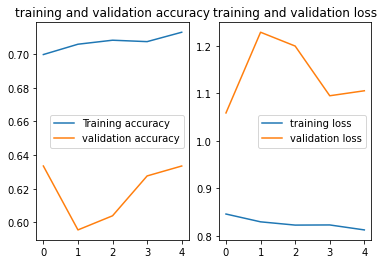

In [16]:
with open("./cifar_weights.txt",'w') as f:
    for v in model.trainable_variables:
        f.write(str(v.name) + '\n')
        f.write(str(v.shape) + '\n')
        f.write(str(v.numpy()) + '\n')

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1,2,1)
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.title("training and validation accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.title("training and validation loss")
plt.legend()
plt.show()

In [20]:
import tensorflow as tf
from tensorflow.keras import Model
import os
import numpy as np
import matplotlib.pyplot as plt

In [21]:
np.set_printoptions(threshold=np.inf)
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [24]:
class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.c1 = tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5),activation='sigmoid')
        self.p1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2)
        self.c2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='sigmoid')
        self.p2 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2)
        
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(120, activation='sigmoid')
        self.dense2 = tf.keras.layers.Dense(84, activation='sigmoid')
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')
    
    def call(self,x):
        x = self.c1(x)
        x = self.p1(x)
        x = self.c2(x)
        x = self.p2(x)
        
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        y = self.dense3(x)
        return y
    
model = LeNet5()
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

model_save_path = "./lenet_checkpoint/lenet5.ckpt"
if os.path.exists(model_save_path+'.index'):
    print("---------------------load model----------------------")
    model.load_weights(model_save_path)
    
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path,
                                                save_weights_only=True,
                                                save_best_only=True)
history = model.fit(x_train, y_train, batch_size=32, epochs=5,validation_data=(x_test,y_test),validation_freq=1,
                   callbacks=[cp_callback])

model.summary()

Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 2.1873 - sparse_categorical_accuracy: 0.1652 - val_loss: 1.9190 - val_sparse_categorical_accuracy: 0.2927
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8806 - sparse_categorical_accuracy: 0.3060 - val_loss: 1.7362 - val_sparse_categorical_accuracy: 0.3614
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6788 - sparse_categorical_accuracy: 0.3913 - val_loss: 1.5840 - val_sparse_categorical_accuracy: 0.4253
Epoch 4/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5781 - sparse_categorical_accuracy: 0.4296 - val_loss: 1.5328 - val_sparse_categorical_accuracy: 0.4371
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5056 - sparse_categorical_accuracy: 0.4482 - val_loss: 1.4823 - val_sparse_categorical_accuracy: 0.4576
Model: "le_net5_1"
_________________________________________________________________
Layer

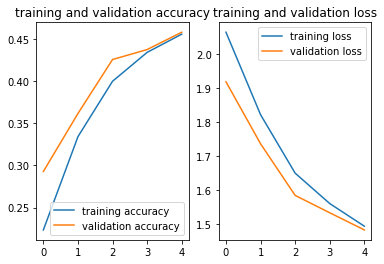

In [26]:
with open("lenet5_weights.txt",'w') as f:
    for v in model.trainable_variables:
        f.write(str(v.name)+'\n')
        f.write(str(v.shape)+'\n')
        f.write(str(v.numpy())+'\n')
    
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1,2,1)
plt.plot(acc, label="training accuracy")
plt.plot(val_acc, label="validation accuracy")
plt.title("training and validation accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()